# Example of simple network forward and backward pass

In [1]:
import numpy as np

In [3]:
# Complete forward pass

def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = 1 / (1+np.exp(-pre_hidden))
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

## Activation Functions in Code

In [4]:
def tanh(x):
    a = np.exp(x)
    b = np.exp(-x)
    return (a - b) / (a + b)

In [5]:
def relu(x):
    return np.where(x > 0, x, 0)

In [6]:
def linear(x):
    return x

In [7]:
def softmax(x):
    q = np.exp(x)
    return q / np.sum(q)

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Loss Functions

In [8]:
def mse(y_, y):
    return np.mean(np.square(y_ - y))

In [9]:
def mae(y_, y):
    return np.mean(np.abs(y_ - y))

In [10]:
def binary_cross_entropy(y_, y):
    return -np.mean(np.sum(y*np.log(y_) + (1 - y) * np.log(1 - y_)))

In [11]:
def categorical_cross_entropy(y_, y):
    return -np.mean(np.sum(y * np.log(y_)))

## Backprop

In [12]:
from copy import deepcopy

x = np.array([[1, 1]])
y = np.array([[0]])

In [14]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss) / 0.0001
            updated_weights[i][index] -= grad * lr
    return updated_weights, original_loss

In [15]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

In [16]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Loss over number of epochs')

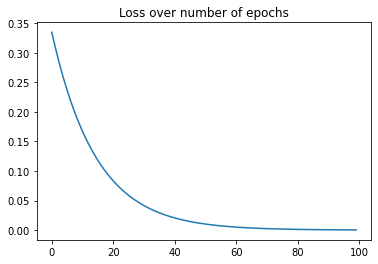

In [18]:
plt.plot(losses)
plt.title('Loss over number of epochs')

In [20]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = sigmoid(pre_hidden)
out = np.dot(hidden, W[2]) + W[3]

In [21]:
out

array([[-0.0174781]])